# A Movie Recommendation system

using association rules and apriori algorithm

In [210]:
!pip install mlxtend


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [220]:
Parameters = {
    'like_threshold': 4.0,
    'confidence_threshold': 0.7,
    'apriori_min': 0.05,
}

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import association_rules, apriori


# Pre-processing

In [222]:
# Load data, genres are separated by |
movies = pd.read_csv('Dataset/movies.csv', sep=',')
ratings = pd.read_csv('Dataset/ratings.csv', sep=',')

movies['genres'] = movies['genres'].str.split('|')

movies.head()

movies_genres = movies[['movieId', 'title', 'genres']].explode('genres')

movies_genres.head()



,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [223]:
# List of all the genres
genres = []
for i in movies_genres['genres']:
    genres.append(i)

genres = list(set(genres))
genres.remove('(no genres listed)')
genres.remove('IMAX')
genres

['Crime',
 'Action',
 'Animation',
 'Mystery',
 'Musical',
 'Horror',
 'Thriller',
 'Comedy',
 'Sci-Fi',
 'Western',
 'Children',
 'Film-Noir',
 'War',
 'Fantasy',
 'Documentary',
 'Drama',
 'Romance',
 'Adventure']

In [224]:


ratings['threshold'] = ratings['rating'] >= Parameters['like_threshold']

ratings.head()

usr_movie_thres = ratings[['userId', 'movieId', 'threshold']]
usr_movie_thres.head()

# Create a dataframe with userId x movieID with the threshold value as integer

usr_movie_thres = usr_movie_thres.pivot_table(index='userId', columns='movieId', values='threshold', aggfunc='sum', fill_value=0)

# # swap movieID with title from movies dataframe
# usr_movie_thres = usr_movie_thres.rename(columns=movies.set_index('movieId')['title'])

usr_movie_thres.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Applying Apriori algorithm

In [225]:
frequent_itemsets = apriori(usr_movie_thres, min_support=Parameters['apriori_min'], use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=Parameters['confidence_threshold'])

rules.sort_values(by='confidence', ascending=False, inplace=True)

rules

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34521,"(4993, 260, 2571, 1270, 1210)",(1196),0.062593,0.281669,0.062593,1.0,3.550265,0.044963,inf,0.766296
23431,"(318, 1196, 1198, 527)",(260),0.059613,0.345753,0.059613,1.0,2.892241,0.039001,inf,0.695721
37019,"(1196, 1198, 7153, 1270, 1210)","(4993, 260)",0.053651,0.153502,0.053651,1.0,6.514563,0.045416,inf,0.894488
28118,"(608, 593, 296, 1210)",(1196),0.050671,0.281669,0.050671,1.0,3.550265,0.036398,inf,0.756672
21604,"(5952, 4993, 1196, 110)",(260),0.055142,0.345753,0.055142,1.0,2.892241,0.036076,inf,0.692429
...,...,...,...,...,...,...,...,...,...,...
28522,"(296, 593, 2858, 1198)",(1210),0.074516,0.241431,0.052161,0.7,2.899383,0.034171,2.528564,0.707844
21771,"(3578, 2571, 110)","(5952, 4993)",0.074516,0.187779,0.052161,0.7,3.727778,0.038168,2.707402,0.790660
31522,"(5952, 4993, 4226)","(7153, 2571)",0.074516,0.135618,0.052161,0.7,5.161538,0.042055,2.881272,0.871176
32491,"(858, 260, 1270)","(296, 1196, 1198)",0.074516,0.108793,0.052161,0.7,6.434247,0.044054,2.970691,0.912583


In [226]:

usr_movie = ratings[['userId', 'movieId']]

usr_movie = usr_movie.groupby('userId')['movieId'].apply(list).reset_index(name='movie_list')

usr_liked = ratings[['userId', 'movieId']].where(ratings['threshold'] == True)
usr_liked.dropna(inplace=True)
usr_liked['movieId'] = usr_liked['movieId'].astype(int)
usr_liked = usr_liked.groupby('userId')['movieId'].apply(list).reset_index(name='liked_list')
usr_liked['userId'] = usr_liked['userId'].astype(int)

# merge usr_movie and usr_liked
usr_movie = pd.merge(usr_movie, usr_liked, on='userId', how='left')
usr_movie

,userId,movie_list,liked_list
0,1,"[31, 1029, 1061, 1129, 1172, 1263, 1287, 1293,...","[1172, 1953, 2105]"
1,2,"[10, 17, 39, 47, 50, 52, 62, 110, 144, 150, 15...","[10, 17, 39, 47, 50, 110, 150, 153, 222, 253, ..."
2,3,"[60, 110, 247, 267, 296, 318, 355, 356, 377, 5...","[110, 296, 318, 356, 778, 1197, 1235, 1378, 17..."
3,4,"[10, 34, 112, 141, 153, 173, 185, 260, 289, 29...","[10, 34, 112, 141, 153, 260, 289, 296, 349, 35..."
4,5,"[3, 39, 104, 141, 150, 231, 277, 344, 356, 364...","[3, 39, 104, 141, 150, 277, 356, 364, 367, 377..."
...,...,...,...
666,667,"[6, 11, 16, 17, 21, 25, 32, 36, 41, 58, 82, 95...","[6, 32, 36, 41, 58, 110, 144, 150, 161, 232, 2..."
667,668,"[296, 318, 593, 608, 720, 1089, 1213, 1221, 12...","[296, 318, 593, 608, 1213, 1221, 1233, 1358, 2..."
668,669,"[223, 260, 381, 480, 785, 913, 968, 1135, 1210...","[223, 260, 785, 913, 968, 1304, 1953, 2395, 23..."
669,670,"[1, 25, 32, 34, 36, 47, 50, 110, 150, 318, 457...","[1, 25, 34, 36, 47, 50, 318, 457, 527, 593, 60..."


In [227]:
def get_recommended(usrID):
    liked = usr_movie['liked_list'][usrID-1]
    recommended = []
    for i, rule in enumerate(rules['antecedents']):
        if rule.issubset(liked):
            recommended.append(rules['consequents'][i])

    recommended = list(set([item for sublist in recommended for item in sublist]))
    recommended = [x for x in recommended if x not in liked]
    recommended = [x for x in recommended if x not in usr_movie['movie_list'][usrID-1]]
    recommended = [x for x in recommended if x in movies['movieId']]
    recommended = movies[movies['movieId'].isin(recommended)]
    recommended = recommended[['movieId', 'title', 'genres']]

    return list(recommended['movieId'])


# Learning from association rules

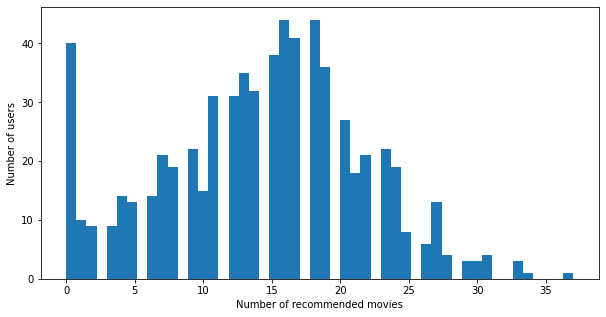

In [228]:
# df with recommended movies for each user
usr_movie['recommended'] = usr_movie['userId'].apply(get_recommended)

# sort by the number of recommended movies
usr_movie['recommended_count'] = usr_movie['recommended'].apply(len)

usr_movie.sort_values(by='recommended_count', ascending=False, inplace=True)

# histogram of the number of recommended movies
plt.figure(figsize=(10, 5))
plt.hist(usr_movie['recommended_count'], bins=50)
plt.xlabel('Number of recommended movies')
plt.ylabel('Number of users')
plt.show()


As we can see, by the amount of people getting none or  close to none recommendations, recommendation system working solely on movies that others recommended might not be sufficient enough.

The reasons for that might be as follows:
- A user watched a lot of movies. The system might recommend movies that were seen by the user.
- A user didn't rate enough movies, the rules might not find any association.
- A user is a unique user, the system might not find any similar users.
- **Rules are too specific.**


# Solving the problem

to solve the problem instead of focusing only on the movies, we'll generalise and try to recommend movies based on the genre and an average rating of the movie.